In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load cleaned file (use the processed cleaned file you saved earlier)
df = pd.read_csv("../data/processed/churn_bigml_20_cleaned.csv")
print("Shape:", df.shape)
print(df.columns.tolist())


Shape: (667, 20)
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [1]:
df['Date'] = pd.date_range(start="2020-01-01", periods=len(df), freq='D')


NameError: name 'pd' is not defined

In [44]:
df.set_index('Date', inplace=True)

print(df.head())

           State  Account length  Area code International plan  \
Date                                                             
2020-01-01    LA             117        408                 No   
2020-01-02    IN              65        415                 No   
2020-01-03    NY             161        415                 No   
2020-01-04    SC             111        415                 No   
2020-01-05    HI              49        510                 No   

           Voice mail plan  Number vmail messages  Total day minutes  \
Date                                                                   
2020-01-01              No                      0              184.5   
2020-01-02              No                      0              129.1   
2020-01-03              No                      0              332.9   
2020-01-04              No                      0              110.4   
2020-01-05              No                      0              119.3   

            Total day calls  Tot

In [45]:
# Resample monthly churn count
monthly_churn = df['Churn'].resample('ME').sum()

print(monthly_churn.head())

Date
2020-01-31    5
2020-02-29    6
2020-03-31    5
2020-04-30    7
2020-05-31    3
Freq: ME, Name: Churn, dtype: int64


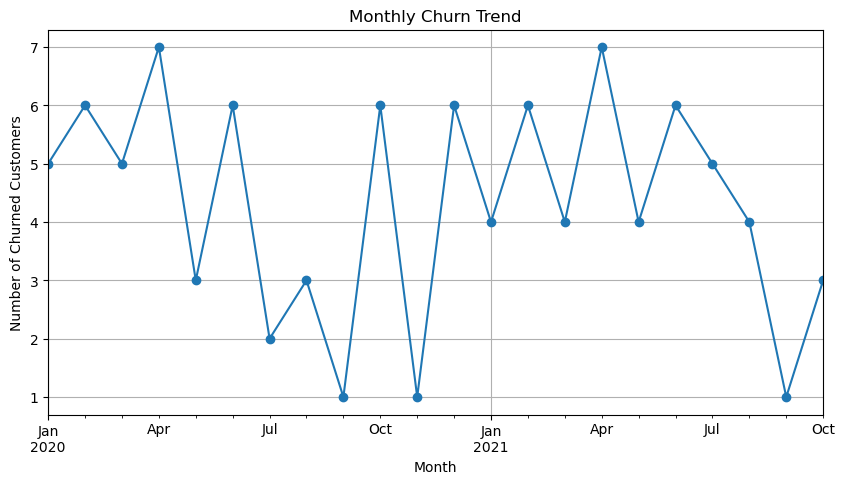

In [46]:
plt.figure(figsize=(10,5))
monthly_churn.plot(marker='o')
plt.title("Monthly Churn Trend")
plt.xlabel("Month")
plt.ylabel("Number of Churned Customers")
plt.grid(True)
plt.show()

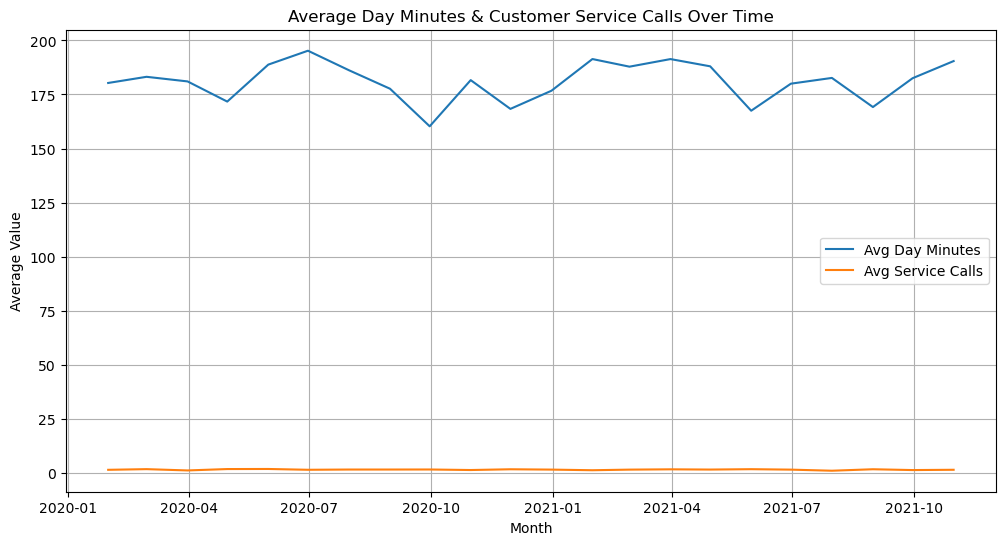

In [47]:
# 6. Resample monthly averages
monthly_avg = df.resample('ME').mean(numeric_only=True)

# Plot example: Day Minutes & Service Calls
plt.figure(figsize=(12,6))
plt.plot(monthly_avg.index, monthly_avg['Total day minutes'], label="Avg Day Minutes")
plt.plot(monthly_avg.index, monthly_avg['Customer service calls'], label="Avg Service Calls")
plt.title("Average Day Minutes & Customer Service Calls Over Time")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True)
plt.show()


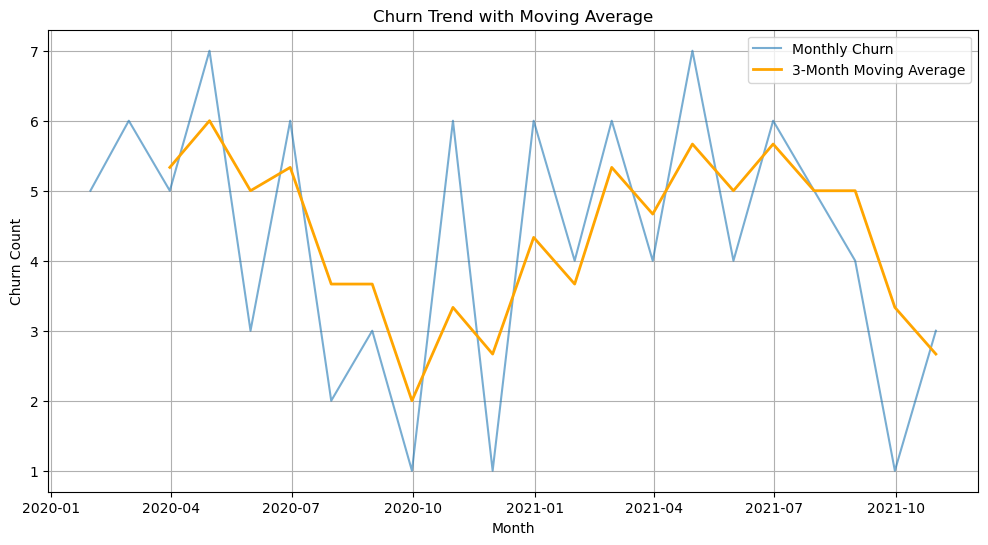

In [48]:
# 7. Moving average (trend smoothing)
moving_avg = monthly_churn.rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_churn.index, monthly_churn.values, label="Monthly Churn", alpha=0.6)
plt.plot(moving_avg.index, moving_avg.values, color="orange", linewidth=2, label="3-Month Moving Average")
plt.title("Churn Trend with Moving Average")
plt.xlabel("Month")
plt.ylabel("Churn Count")
plt.legend()
plt.grid(True)
plt.show()


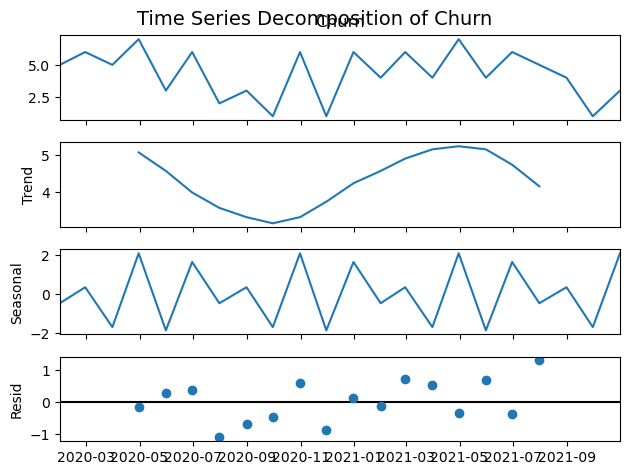

In [49]:
decomposition = seasonal_decompose(monthly_churn, model='additive', period=6)

decomposition.plot()
plt.suptitle("Time Series Decomposition of Churn", fontsize=14)
plt.show()


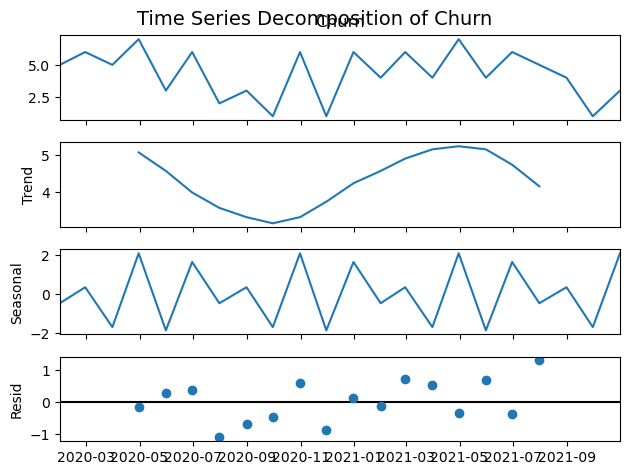

In [52]:
decomposition.plot()
plt.suptitle("Time Series Decomposition of Churn", fontsize=14)
plt.savefig("decomposition_churn.png")
plt.show()


In [ ]:
# Load dataset – Import cleaned churn dataset, check shape and columns.

# Create Date index – Generate daily dates (2020-01-01 onward) and set as index.

# Resample churn (monthly) – Count churned customers per month (.resample('ME').sum()).

# Resample numeric features – Take monthly averages for numerical columns.

# Moving average – Apply 3-month rolling mean to smooth churn trend.

# Plot churn trend – Show both raw churn and moving average on a line chart.

# Plot key metrics – Example: monthly averages of “Total day minutes” and “Customer service calls.”

# Time-series decomposition – Split churn series into Trend, Seasonality, Residuals.

# Insights – Identify overall trend, repeating seasonal patterns, and unusual spikes.

# Save outputs – Export monthly churn data and figures for reporting.

# Limitations – Date column is simulated (not real). Results are illustrative.

# Next step – Use real timestamped dataset or move to forecasting/modeling.